## Basic map coloring example

### In line with the running CSP example of the Russell&Norvig book 'Artificial Intelligence: A modern approach'

Map and map plotting code from 'praxidike97': https://github.com/praxidike97/map-coloring

This example requires you to install _geopandas_ and _matplotlib_.

In [1]:
! pip install --upgrade geopandas shapely matplotlib --quiet  # make sure they are at their latest version

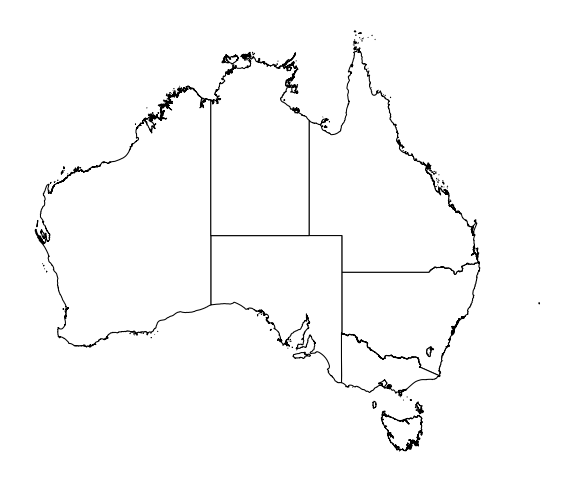

In [2]:
# from https://github.com/praxidike97/map-coloring
import geopandas as gpd
import matplotlib.pyplot as plt

class Australia():
    state_dict = {"NSW": "New South Wales", "V": "Victoria", "Q": "Queensland",
                  "SA": "South Australia", "WA": "Western Australia", "T": "Tasmania",
                  "NT": "Northern Territory", "ACT": "Australian Capital Territory"}
    constraints = {"NSW": ["V", "Q", "SA", "ACT"], "V": ["SA", "NSW"],
                   "Q": ["NT", "SA", "NSW"], "SA": ["WA", "NT", "Q", "V", "NSW"],
                   "WA": ["SA", "NT"], "T": ["V"], "NT": ["WA", "SA", "Q"], "ACT": ["NSW"]}
    variables = ["NSW", "WA", "NT", "SA", "Q", "V", "T", "ACT"]
    geojson = 'https://raw.githubusercontent.com/praxidike97/map-coloring/master/geojson/australia.geojson'
    name = 'australia'

def plot_country(country, state_colors=dict(), save=False, name=""):
    state_dict = country.state_dict
    geojson_file = country.geojson

    plt.rcParams['figure.figsize'] = (9, 6)

    df_country = gpd.read_file(geojson_file)
    ax = df_country.plot(linewidth=0.75, color='white', edgecolor='black')

    for state_abb, state_color in zip(state_colors.keys(), state_colors.values()):
        df_country.loc[df_country['STATE_NAME'] == state_dict[state_abb]].plot(color=state_color, ax=ax)

    plt.axis('off')

    if save:
        plt.savefig(name)
    else:
        plt.show()

# let's draw an empty map...
plot_country(Australia())

In [3]:
# lets model the CSP problem with the 'CPMpy' library
from cpmpy import *

colors = ["green", "blue", "red"]
n = len(colors)-1 # at most 'n' colors

states = ["NSW", "WA", "NT", "SA", "Q", "V", "T", "ACT"]
# Decision variables
variable = dict()
for state in states:
    variable[state] = intvar(0,n, name=state)

neighbors = {"NSW": ["V", "Q", "SA", "ACT"], # New South Wales
             "V": ["SA", "NSW"], # Victoria
             "Q": ["NT", "SA", "NSW"], # Queensland
             "SA": ["WA", "NT", "Q", "V", "NSW"], # Southern Australia
             "WA": ["SA", "NT"], # Western Australia
             "T": ["V"], # Tasmania
             "NT": ["WA", "SA", "Q"], # Northern Territory
             "ACT": ["NSW"], # Australian Capital Territory, for bonus points
            } 
# Constraints
m = Model()
for state1, neighs in neighbors.items():
    for state2 in neighs:
        m += ( variable[state1] != variable[state2] )

m.solve()
print(m.status(), "\n")
for name, var in variable.items():
    print(name, " -- ", colors[var.value()])

ExitStatus.OPTIMAL (0.004122445000000001 seconds) 

NSW  --  green
WA  --  red
NT  --  green
SA  --  blue
Q  --  red
V  --  red
T  --  green
ACT  --  blue


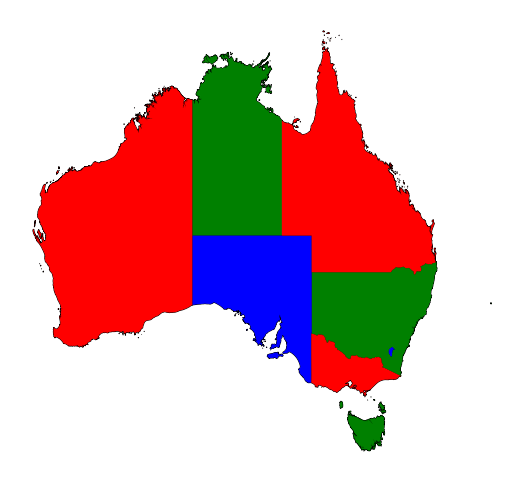

In [4]:
# lets pretty-print the map
plot_country(Australia(), dict((name,colors[var.value()]) for name,var in variable.items()))